In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './Notebook/Hindi/Train/',
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=20,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    './Notebook/Hindi/Test/',
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=20,
    class_mode='categorical'
)

Found 61200 images belonging to 36 classes.
Found 10800 images belonging to 36 classes.


In [6]:

print("Sample batch shape:", next(train_generator)[0].shape)
print("Train classes:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)


Sample batch shape: (20, 32, 32, 1)
Train classes: {'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35}
Number of classes: 36


In [7]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(num_classes, activation='softmax')  # Dynamically set to match data
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
try:
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
    )
except Exception as e:
    print("Error:", str(e))

Epoch 1/10
3060/3060 [==============================] - 379s 122ms/step - loss: 1.1272 - accuracy: 0.6857 - val_loss: 0.1740 - val_accuracy: 0.9514
Epoch 2/10
3060/3060 [==============================] - 257s 84ms/step - loss: 0.4619 - accuracy: 0.8643 - val_loss: 0.0947 - val_accuracy: 0.9713
Epoch 3/10
3060/3060 [==============================] - 241s 79ms/step - loss: 0.3595 - accuracy: 0.8944 - val_loss: 0.1045 - val_accuracy: 0.9686
Epoch 4/10
3060/3060 [==============================] - 220s 72ms/step - loss: 0.3097 - accuracy: 0.9111 - val_loss: 0.1362 - val_accuracy: 0.9765
Epoch 5/10
3060/3060 [==============================] - 220s 72ms/step - loss: 0.2841 - accuracy: 0.9182 - val_loss: 4.1335 - val_accuracy: 0.8944
Epoch 6/10
3060/3060 [==============================] - 225s 73ms/step - loss: 0.2586 - accuracy: 0.9257 - val_loss: 0.0641 - val_accuracy: 0.9824
Epoch 7/10
3060/3060 [==============================] - 217s 71ms/step - loss: 0.2468 - accuracy: 0.9288 - val_loss: 

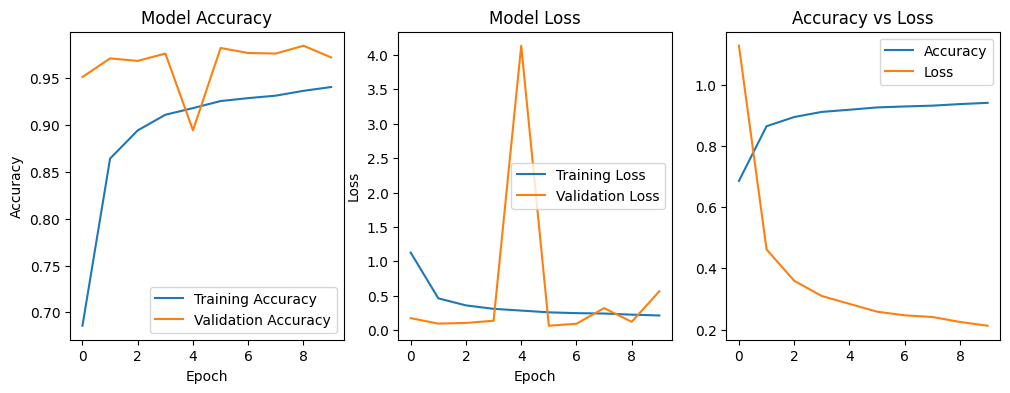

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

540/540 [==============================] - 15s 27ms/step - loss: 0.5656 - accuracy: 0.9723
Test accuracy: 0.9723
